# Important Note:

- This assigement requires at least PostgreSQL 9.5 or  higher release since this assignments uses **ROLLUP** and **CUBE** grouping operations

- Curently the DSCC has a PostgreSQL 10.5 that we will use for this assignment


 
# Deliverables:

- Submit files that have the name: YourLastName_Walmart:

 1. Your **PDF document** that has your Source code and output
 2. Your **ipynb script** that has your Source code and output
 3. You may zip these files and submit


# Objectives:

- Experiment with SQL grouping operations like CUBE and ROLLUP to retrieve, group and cluster data from Walmart dataset
- Use Ecnomic data to analyze and visualize the weekly total sales per Walmart-store




# Author:   Atef Bader
 1. Last Edit 10-28-2018


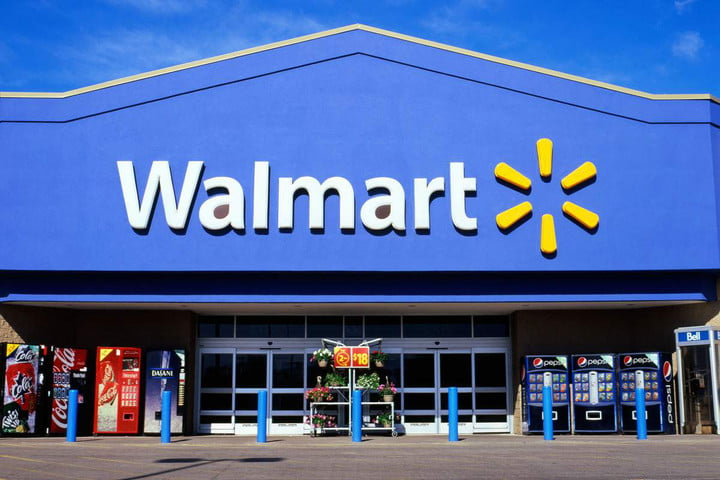

# Descriptions and Requirement Specifications

## Walmart Weekly Sales

Walmart is  the world's largest company by revenue, it has over US$500 billion; Walmart has 11,718 stores and clubs in 28 countries. 


You can read more about Walmart by visitin the following page __[More Info](https://en.wikipedia.org/wiki/Walmart)__ 

## Walmart total weekly sales

Walmart tracks the total weekly sales per store and there is a sample dataset that is published on **Kaggle**, you can read more about this dataset  __[here](https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting)__ 

In this assignment we will not discuss the store sales **prediction**, rather we will focus on store sales **description**

**Note:** Unlike the employment weekly numbers, the CPI is published monthly by LBS even though it is listed on a weekly basis teh given dataset.

The walmart database is composed of 3 tables that are populated on PosgeSQL10.5 on DSCC. The tables are listed below:

#### Stores:
- Store: The store number. Range from 1-45.
- Type: Three types of stores ‘A’, ‘B’ or ‘C’.
- Size: Sets the size of a Store would be calculated by the no. of products available in the particular store ranging from 34,000 to 210,000.

#### Weekly_Sales: 
- Store: The store which observation in recorded 1-45.
- Dept: One of 1-99 that shows the department.
- IsHoliday: Boolean value representing a holiday week or not.


#### Features: 
- Temperature:Temperature of the region during that week.
- Fuel_Price: Fuel Price in that region during that week.
- MarkDown1:5 : Represents the Type of markdown and what quantity was available during that week.
- CPI: Consumer Price Index during that week.
- Unemployment: The unemployment rate during that week in the region of the store.



# Bureau of Labor Statistics

The Bureau of Labor Statistics __[(BLS)](https://www.bls.gov/home.htm)__  of the U.S. Department of Labor publishes many of the  monthly and weekly MAJOR ECONOMIC INDICATORS that are used to measure the labor market, inflation and price changes in the economy.  You can read more about these indicators __[here](https://www.bls.gov/bls/newsrels.htm#major)__ 

Examples of these indicators that you will see in the database for this assignment are unemployement and CPI



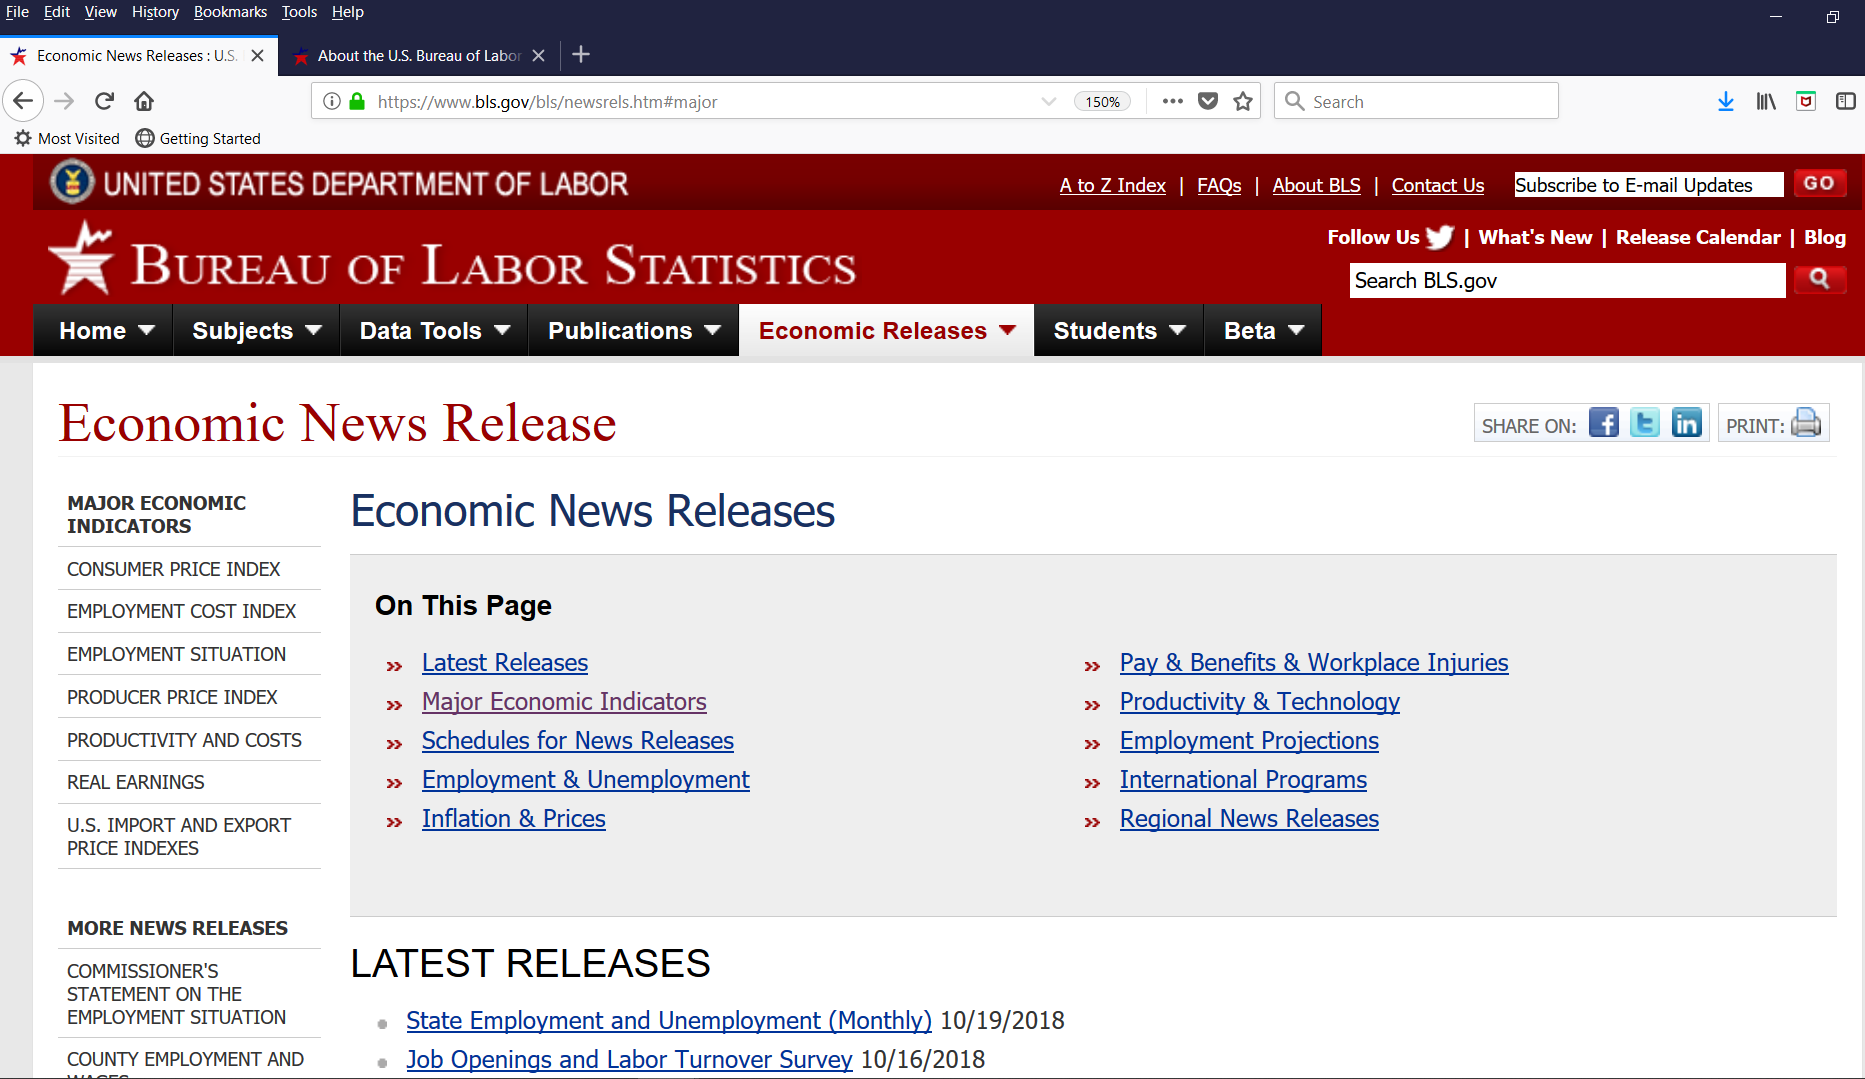

# PostgreSQL 10.5

Postgres provides few programming language constructs for complex grouping operations like ROLLUP and CUBE. You can read more about these grouping operations __[here](https://www.postgresql.org/docs/10/static/queries-table-expressions.html#QUERIES-GROUPING-SETS
)__



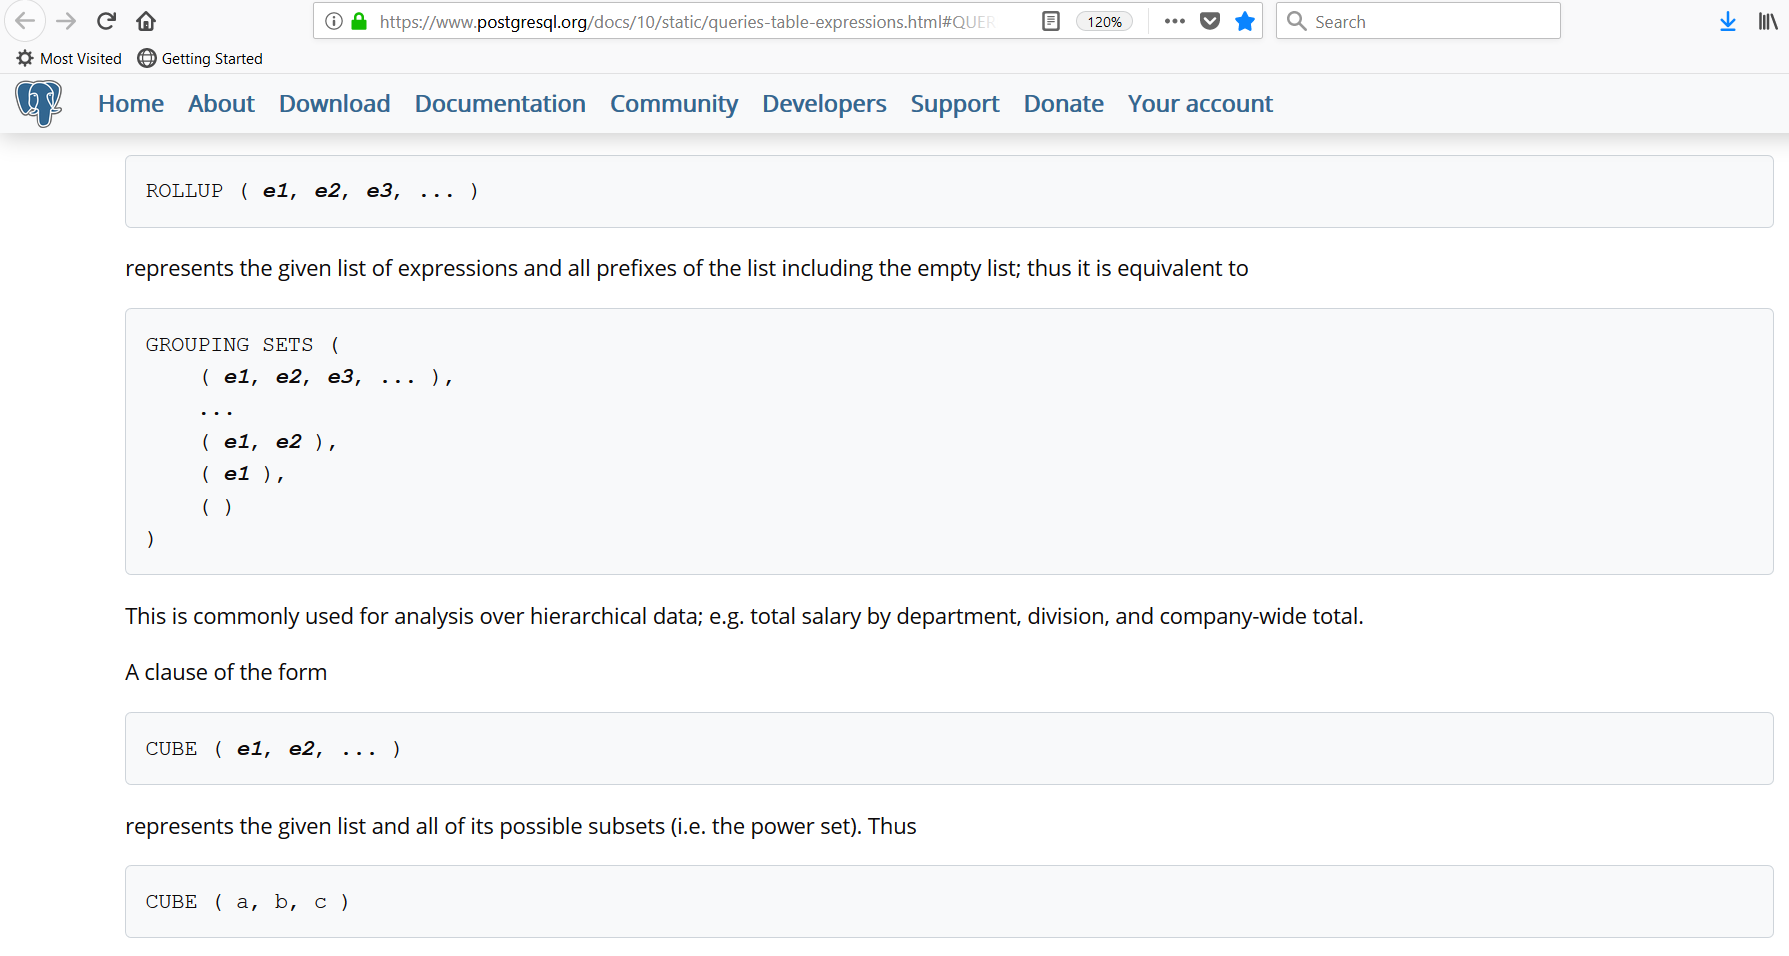




## Import the packages needed

In [1]:

import psycopg2
import csv
import pandas as pd
import numpy as np
from datetime import datetime,date
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline


In [2]:
#setup the format for the pretty print of Total
pd.options.display.float_format = '{:20,.2f}'.format


### First, we need to connect to the postgresql10 database server
- make sure you are already connected to VPN before you execute the following command 

In [3]:
db_connection = psycopg2.connect(host='postgresql10.sps.northwestern.edu',dbname="walmart", user="aso4098" , password="Dinarahon12@")


cursor = db_connection.cursor()

In [11]:
cursor.execute("SELECT * from weekly_sales")
rows=cursor.fetchall()
colnames = [desc[0] for desc in cursor.description]
df = pd.DataFrame(rows, columns = colnames)
df.to_csv("C:\\Users\\asidd\\Desktop\\MSDS\\420 Database Systems\\Lecture 7\\walmart.csv")

## Query #1: 
- Get the total weekly sales by store

In [4]:
cursor.execute("SELECT Store, sum(Weekly_Sales) from weekly_sales GROUP BY Store")
rows=cursor.fetchall()

In [6]:
colnames = [desc[0] for desc in cursor.description]

#total_weekly_sales_by_store = pd.DataFrame(rows, columns=['Store','Total'])
total_weekly_sales_by_store = pd.DataFrame(rows, columns = colnames)


total_weekly_sales_by_store.tail()

,store,sum
40,41,"181,341,934.89"
41,42,"79,565,752.43"
42,43,"90,565,435.41"
43,44,"43,293,087.84"
44,45,"112,395,341.42"


## Query #2: 
- Get the total weekly sales by store and department

In [8]:
cursor.execute("SELECT Store, Dept, sum(Weekly_Sales) from weekly_sales GROUP BY Store, Dept")
rows=cursor.fetchall()

In [10]:
colnames = [desc[0] for desc in cursor.description]

#total_weekly_sales_by_store_dept = pd.DataFrame(rows, columns=['Store','Department','Total'])
total_weekly_sales_by_store_dept = pd.DataFrame(rows, columns = colnames)

total_weekly_sales_by_store_dept = total_weekly_sales_by_store_dept.sort_values(by=['store', 'dept'])

total_weekly_sales_by_store_dept

,store,dept,sum
11,1,1,"3,219,405.18"
2015,1,2,"6,592,598.93"
672,1,3,"1,880,518.36"
303,1,4,"5,285,874.09"
35,1,5,"3,468,885.58"
940,1,6,"686,654.56"
1408,1,7,"3,513,007.70"
2084,1,8,"5,107,710.84"
2107,1,9,"4,012,873.47"
328,1,10,"4,437,774.25"


## Query #3: 
- Get the total weekly sales by store and week

In [8]:
cursor.execute("SELECT Store, Date, sum(Weekly_Sales) from weekly_sales GROUP BY Store, Date")
rows=cursor.fetchall()

In [9]:
total_weekly_sales_by_store_dept = pd.DataFrame(rows, columns=['Store','Date','Total']) 

total_weekly_sales_by_store_dept = total_weekly_sales_by_store_dept.sort_values(by=['Store', 'Date'])


total_weekly_sales_by_store_dept

,Store,Date,Total
3874,1,2010-02-05,"1,643,690.90"
2271,1,2010-02-12,"1,641,957.44"
4071,1,2010-02-19,"1,611,968.17"
855,1,2010-02-26,"1,409,727.59"
2331,1,2010-03-05,"1,554,806.68"
4027,1,2010-03-12,"1,439,541.59"
4302,1,2010-03-19,"1,472,515.79"
2925,1,2010-03-26,"1,404,429.92"
5899,1,2010-04-02,"1,594,968.28"
2009,1,2010-04-09,"1,545,418.53"


## Query #4: 
- Get the total weekly sales by department and week

In [10]:
cursor.execute("SELECT Dept, Date, sum(Weekly_Sales) from weekly_sales GROUP BY Dept, Date")
rows=cursor.fetchall()

In [11]:
total_weekly_sales_by_dept_date = pd.DataFrame(rows, columns=['Dept','Date','Total']) 

total_weekly_sales_by_dept_date = total_weekly_sales_by_dept_date.sort_values(by=['Dept', 'Date'])


total_weekly_sales_by_dept_date

,Dept,Date,Total
8954,1,2010-02-05,"881,833.41"
7577,1,2010-02-12,"1,457,182.40"
9110,1,2010-02-19,"1,118,257.36"
6345,1,2010-02-26,"681,391.58"
2020,1,2010-03-05,"762,652.57"
9090,1,2010-03-12,"803,886.93"
9338,1,2010-03-19,"846,686.47"
8139,1,2010-03-26,"1,045,724.42"
5118,1,2010-04-02,"2,451,952.54"
7341,1,2010-04-09,"1,518,946.82"


## Query #5: 
- Get the total weekly sales using **ROLLUP** clause for the hierarchical data: store, department and week

In [12]:
cursor.execute("SELECT Store, Dept, Date, sum(Weekly_Sales) from weekly_sales GROUP BY ROLLUP(Store, Dept, Date)")
rows=cursor.fetchall()

In [13]:


rollup_by_store_dept_date = pd.DataFrame(rows, columns=['Store','Dept','Date','Total']) 

#For the pretty print : Replace NaN by -1

rollup_by_store_dept_date['Store'] = rollup_by_store_dept_date['Store'].replace(np.nan,-1) 
rollup_by_store_dept_date['Dept'] = rollup_by_store_dept_date['Dept'].replace(np.nan,-1) 

#type conversion of values returned by ROLLUP

rollup_by_store_dept_date['Store'] = rollup_by_store_dept_date['Store'].astype(int)
rollup_by_store_dept_date['Dept'] = rollup_by_store_dept_date['Dept'].astype(int)
rollup_by_store_dept_date['Total'] = rollup_by_store_dept_date['Total'].astype(np.float64)


#For the pretty print: Replace -1  by BLANK for Store and department
rollup_by_store_dept_date['Store'].replace(-1,'',inplace=True)
rollup_by_store_dept_date['Dept'].replace(-1,'',inplace=True)

#For the pretty print: Replace NaN  by BLANK for date
rollup_by_store_dept_date['Date'] = rollup_by_store_dept_date['Date'].dt.date
rollup_by_store_dept_date['Date'].replace(np.nan,'',inplace=True)
    

rollup_by_store_dept_date = rollup_by_store_dept_date.sort_values(by=['Store', 'Dept', 'Date'])


rollup_by_store_dept_date

,Store,Dept,Date,Total
56093,1,1,2010-02-05,"24,924.50"
267400,1,1,2010-02-12,"46,039.49"
10751,1,1,2010-02-19,"41,595.55"
295442,1,1,2010-02-26,"19,403.54"
162717,1,1,2010-03-05,"21,827.90"
287383,1,1,2010-03-12,"21,043.39"
248692,1,1,2010-03-19,"22,136.64"
317889,1,1,2010-03-26,"26,229.21"
157684,1,1,2010-04-02,"57,258.43"
219234,1,1,2010-04-09,"42,960.91"


## Query #6: 
- Get the total weekly sales using **ROLLUP** clause for the hierarchical data: store, department and week

In [12]:
cursor.execute("SELECT Store, Dept, sum(Weekly_Sales) from weekly_sales GROUP BY ROLLUP(Store, Dept)")
rows=cursor.fetchall()

In [15]:
pd.DataFrame(rows, columns=['Store','Dept','Total']).sort_values(by=['Store', 'Dept'])

,Store,Dept,Total
13,1.00,1.00,"3,219,405.18"
2017,1.00,2.00,"6,592,598.93"
674,1.00,3.00,"1,880,518.36"
305,1.00,4.00,"5,285,874.09"
37,1.00,5.00,"3,468,885.58"
941,1.00,6.00,"686,654.56"
1412,1.00,7.00,"3,513,007.70"
2086,1.00,8.00,"5,107,710.84"
2108,1.00,9.00,"4,012,873.47"
329,1.00,10.00,"4,437,774.25"


In [15]:
rollup_by_store_dept = pd.DataFrame(rows, columns=['Store','Dept','Total']) 

#For the pretty print : Replace NaN by -1

rollup_by_store_dept['Store'] = rollup_by_store_dept['Store'].replace(np.nan,-1) 
rollup_by_store_dept['Dept'] = rollup_by_store_dept['Dept'].replace(np.nan,-1) 

#type conversion of values returned by ROLLUP

rollup_by_store_dept['Store'] = rollup_by_store_dept['Store'].astype(int)
rollup_by_store_dept['Dept'] = rollup_by_store_dept['Dept'].astype(int)
rollup_by_store_dept['Total'] = rollup_by_store_dept['Total'].astype(np.float64)


#For the pretty print: Replace -1  by BLANK for Store and department
rollup_by_store_dept['Store'].replace(-1,'',inplace=True)
rollup_by_store_dept['Dept'].replace(-1,'',inplace=True)
    

rollup_by_store_dept = rollup_by_store_dept.sort_values(by=['Store', 'Dept'])


rollup_by_store_dept

,Store,Dept,Total
13,1,1,"3,219,405.18"
2017,1,2,"6,592,598.93"
674,1,3,"1,880,518.36"
305,1,4,"5,285,874.09"
37,1,5,"3,468,885.58"
941,1,6,"686,654.56"
1412,1,7,"3,513,007.70"
2086,1,8,"5,107,710.84"
2108,1,9,"4,012,873.47"
329,1,10,"4,437,774.25"


## Query #7: 
- Get the total weekly sales using **CUBE** clause for the hierarchical data: store, department and week

In [16]:
cursor.execute("SELECT Store, Dept, Date, sum(Weekly_Sales) from weekly_sales GROUP BY CUBE(Store, Dept, Date)")
rows=cursor.fetchall()

In [17]:
pd.DataFrame(rows, columns=['Store','Dept','Date','Total']).sort_values(by=['Store', 'Dept', 'Date']) 

,Store,Dept,Date,Total
0,1.00,1.00,2010-02-05,"24,924.50"
1,1.00,1.00,2010-02-12,"46,039.49"
2,1.00,1.00,2010-02-19,"41,595.55"
3,1.00,1.00,2010-02-26,"19,403.54"
4,1.00,1.00,2010-03-05,"21,827.90"
5,1.00,1.00,2010-03-12,"21,043.39"
6,1.00,1.00,2010-03-19,"22,136.64"
7,1.00,1.00,2010-03-26,"26,229.21"
8,1.00,1.00,2010-04-02,"57,258.43"
9,1.00,1.00,2010-04-09,"42,960.91"


In [17]:
cube_by_store_dept_date = pd.DataFrame(rows, columns=['Store','Dept','Date','Total']) 

#For the pretty print : Replace NaN by -1

cube_by_store_dept_date['Store'] = cube_by_store_dept_date['Store'].replace(np.nan,-1) 
cube_by_store_dept_date['Dept'] = cube_by_store_dept_date['Dept'].replace(np.nan,-1) 

#type conversion of values returned by ROLLUP

cube_by_store_dept_date['Store'] = cube_by_store_dept_date['Store'].astype(int)
cube_by_store_dept_date['Dept'] = cube_by_store_dept_date['Dept'].astype(int)
cube_by_store_dept_date['Total'] = cube_by_store_dept_date['Total'].astype(np.float64)


#For the pretty print: Replace -1  by BLANK for Store and department
cube_by_store_dept_date['Store'].replace(-1,'',inplace=True)
cube_by_store_dept_date['Dept'].replace(-1,'',inplace=True)

#For the pretty print: Replace NaN  by BLANK for date
cube_by_store_dept_date['Date'] = cube_by_store_dept_date['Date'].dt.date
cube_by_store_dept_date['Date'].replace(np.nan,'',inplace=True)
    

cube_by_store_dept_date = cube_by_store_dept_date.sort_values(by=['Store', 'Dept', 'Date'])


cube_by_store_dept_date

,Store,Dept,Date,Total
0,1,1,2010-02-05,"24,924.50"
1,1,1,2010-02-12,"46,039.49"
2,1,1,2010-02-19,"41,595.55"
3,1,1,2010-02-26,"19,403.54"
4,1,1,2010-03-05,"21,827.90"
5,1,1,2010-03-12,"21,043.39"
6,1,1,2010-03-19,"22,136.64"
7,1,1,2010-03-26,"26,229.21"
8,1,1,2010-04-02,"57,258.43"
9,1,1,2010-04-09,"42,960.91"


## Query #8: 
- Get  the **descriptive statisitics** per store

In [18]:
cursor.execute("SELECT * from weekly_sales")
rows=cursor.fetchall()

In [19]:
weekly_sales = pd.DataFrame(rows, columns=['Store','Dept', 'Date','Weekly_Sales','IsHoliday']) 

#For the pretty print: format date with no time-field
weekly_sales['Date'] = weekly_sales['Date'].dt.date


#### DataFrame  has few good methods for descriptive statistics, grouping, and heirarchical clusterning:
- Count only non-null values, use **count**
- Count total values including null values, use **size** attribute
- Count distinct values, use **nunique**
- **stack()** on the **groupby** result will produce the pretty print

In [20]:
weekly_sales.groupby('Store').agg(['count', 'size', 'nunique', 'max']).stack()

Dept        Date         Weekly_Sales IsHoliday
Store                                                          
1     count    10244       10244            10,244.00     10244
      size     10244       10244            10,244.00     10244
      nunique     77         143            10,042.00         2
      max         99  2012-10-26           203,670.47      True
2     count    10238       10238            10,238.00     10238
      size     10238       10238            10,238.00     10238
      nunique     78         143            10,088.00         2
      max         99  2012-10-26           285,353.53      True
3     count     9036        9036             9,036.00      9036
      size      9036        9036             9,036.00      9036
      nunique     72         143             8,688.00         2
      max         98  2012-10-26           155,897.94      True
4     count    10272       10272            10,272.00     10272
      size     10272       10272            10,272.00     10272
      nunique     78         143            10,098.00         2
      max         99  2012-10-26           385,051.04      True
5     count     8999        8999             8,999.00      8999
      size      8999        8999             8,999.00      8999
      nunique     72         143             8,594.00         2
      max         98  2012-10-26            93,517.72      True
6     count    10211       10211            10,211.00     10211
      size     10211       10211            10,211.00     10211
      nunique     77         143            10,076.00         2
      max         99  2012-10-26           342,578.65      True
7     count     9762        9762             9,762.00      9762
      size      9762        9762             9,762.00      9762
      nunique     76         143             9,391.00         2
      max         99  2012-10-26           222,921.09      True
8     count     9895        9895             9,895.00      9895
      size      9895        9895             9,895.00      9895
...              ...         ...                  ...       ...
38    nunique     63         143             6,715.00         2
      max         99  2012-10-26           100,618.04      True
39    count     9878        9878             9,878.00      9878
      size      9878        9878             9,878.00      9878
      nunique     75         143             9,713.00         2
      max         99  2012-10-26           351,553.98      True
40    count    10017       10017            10,017.00     10017
      size     10017       10017            10,017.00     10017
      nunique     77         143             9,724.00         2
      max         99  2012-10-26           145,504.24      True
41    count    10088       10088            10,088.00     10088
      size     10088       10088            10,088.00     10088
      nunique     77         143             9,864.00         2
      max         99  2012-10-26           290,809.17      True
42    count     6953        6953             6,953.00      6953
      size      6953        6953             6,953.00      6953
      nunique     62         143             6,452.00         2
      max         98  2012-10-26           112,152.35      True
43    count     6751        6751             6,751.00      6751
      size      6751        6751             6,751.00      6751
      nunique     61         143             6,292.00         2
      max         99  2012-10-26           108,517.42      True
44    count     7169        7169             7,169.00      7169
      size      7169        7169             7,169.00      7169
      nunique     62         143             6,548.00         2
      max         99  2012-10-26            66,629.98      True
45    count     9637        9637             9,637.00      9637
      size      9637        9637             9,637.00      9637
      nunique     74         143             9,381.00         2
      max         98  2012-10-26           240,7

## Query #9: 
- Get  the top 500 weekly sales and plot them (Red color for Holiday and Blue color for Not Holiday) against the weekly Unemployment and Temperature 


In [21]:
cursor.execute("SELECT * from weekly_sales")
rows=cursor.fetchall()

In [22]:
weekly_sales = pd.DataFrame(rows, columns=['Store','Dept', 'Date','Weekly_Sales','IsHoliday']) 

weekly_sales = weekly_sales.sort_values(by=['Weekly_Sales'], ascending=False)

In [23]:
top_ten_weekly_sales = weekly_sales[:500]

top_ten_weekly_sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
95373,10,72,2010-11-26,"693,099.36",True
338013,35,72,2011-11-25,"649,770.18",True
95425,10,72,2011-11-25,"630,999.19",True
337961,35,72,2010-11-26,"627,962.93",True
135665,14,72,2010-11-26,"474,330.10",True


In [24]:
cursor.execute("SELECT * from features")
rows=cursor.fetchall()

In [25]:
weekly_sales_temp_unemp = pd.DataFrame(rows, columns=['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday'])

In [26]:
# Sanity test that we got good data from db server

weekly_sales_temp_unemp.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.57,0.00,0.00,0.00,0.00,0.00,211.10,8.11,False
1,1,2010-02-12,38.51,2.55,0.00,0.00,0.00,0.00,0.00,211.24,8.11,True
2,1,2010-02-19,39.93,2.51,0.00,0.00,0.00,0.00,0.00,211.29,8.11,False
3,1,2010-02-26,46.63,2.56,0.00,0.00,0.00,0.00,0.00,211.32,8.11,False
4,1,2010-03-05,46.50,2.62,0.00,0.00,0.00,0.00,0.00,211.35,8.11,False


In [27]:
weekly_sales_temp_unemp.groupby('Store').agg(['count', 'size', 'nunique', 'max']).stack()

Date          Temperature           Fuel_Price  \
Store                                                                          
1     count                    182               182.00               182.00   
      size                     182               182.00               182.00   
      nunique                  182               181.00               169.00   
      max      2013-07-26 00:00:00                91.65                 3.91   
2     count                    182               182.00               182.00   
      size                     182               182.00               182.00   
      nunique                  182               179.00               169.00   
      max      2013-07-26 00:00:00                93.34                 3.91   
3     count                    182               182.00               182.00   
      size                     182               182.00               182.00   
      nunique                  182               180.00               169.00   
      max      2013-07-26 00:00:00                89.12                 3.91   
4     count                    182               182.00               182.00   
      size                     182               182.00               182.00   
      nunique                  182               177.00               168.00   
      max      2013-07-26 00:00:00                86.29                 3.88   
5     count                    182               182.00               182.00   
      size                     182               182.00               182.00   
      nunique                  182               182.00               169.00   
      max      2013-07-26 00:00:00                91.07                 3.91   
6     count                    182               182.00               182.00   
      size                     182               182.00               182.00   
      nunique                  182               182.00               169.00   
      max      2013-07-26 00:00:00                91.46                 3.91   
7     count                    182               182.00               182.00   
      size                     182               182.00               182.00   
      nunique                  182               177.00               165.00   
      max      2013-07-26 00:00:00                68.84                 3.94   
8     count                    182               182.00               182.00   
      size                     182               182.00               182.00   
...                            ...                  ...                  ...   
38    nunique                  182               180.00               166.00   
      max      2013-07-26 00:00:00               101.95                 4.47   
39    count                    182               182.00               182.00   
      size                     182               182.00               182.00   
      nunique                  182               180.00               169.00   
      max      2013-07-26 00:00:00                88.65                 3.91   
40    count                    182               182.00               182.00   
      size                     182               182.00               182.00   
      nunique                  182               178.00               165.00   
      max      2013-07-26 00:00:00                76.67                 4.10   
41    count                    182               182.00               182.00   
      size                     182               182.00               182.00   
      nunique                  182               175.00               165.00   
      max      2013-07-26 00:00:00                76.54                 3.94   
42    count                    182               182.00               182.00   
      size                     182               182.00               182.00   
      nunique                  182               176.00               174.00   
      max      2013-07-26 00:0

In [28]:
unemployment = []
temperature = []

for row in top_ten_weekly_sales.itertuples():
    temperature.append(weekly_sales_temp_unemp[(weekly_sales_temp_unemp.Store == row.Store) & (weekly_sales_temp_unemp.Date == row.Date)]['Temperature'].values[0])
    unemployment.append(weekly_sales_temp_unemp[(weekly_sales_temp_unemp.Store == row.Store) & (weekly_sales_temp_unemp.Date == row.Date)]['Unemployment'].values[0])



In [29]:
se_unemployment = pd.Series(unemployment)
se_temperature = pd.Series(temperature)

In [30]:
top_ten_weekly_sales.insert(loc=5, column='Unemployment', value=se_unemployment.values)
top_ten_weekly_sales.insert(loc=6, column='Temperature', value=se_temperature.values)


In [31]:
top_ten_weekly_sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Unemployment,Temperature
95373,10,72,2010-11-26,"693,099.36",True,9.00,55.33
338013,35,72,2011-11-25,"649,770.18",True,8.74,47.88
95425,10,72,2011-11-25,"630,999.19",True,7.87,60.68
337961,35,72,2010-11-26,"627,962.93",True,8.76,46.67
135665,14,72,2010-11-26,"474,330.10",True,8.72,46.15


In [32]:
top_ten_weekly_sales.describe()

,Store,Dept,Weekly_Sales,Unemployment,Temperature
count,500.00,500.00,500.00,500.00,500.00
mean,14.10,77.46,"208,667.25",7.59,51.54
std,8.61,27.57,"62,695.45",1.52,16.37
min,1.00,1.00,"170,170.92",3.88,17.95
25%,10.00,72.00,"177,431.23",6.96,39.37
50%,14.00,92.00,"186,580.04",7.82,49.91
75%,20.00,92.00,"207,864.04",8.57,64.24
max,45.00,95.00,"693,099.36",14.31,88.55


In [33]:

feature0_holiday = top_ten_weekly_sales[top_ten_weekly_sales.IsHoliday == True]['Weekly_Sales'].values
feature0_not_holiday = top_ten_weekly_sales[top_ten_weekly_sales.IsHoliday == False]['Weekly_Sales'].values

feature1_holiday = top_ten_weekly_sales[top_ten_weekly_sales.IsHoliday == True]['Unemployment'].values
feature1_not_holiday = top_ten_weekly_sales[top_ten_weekly_sales.IsHoliday == False]['Unemployment'].values

feature2_holiday = top_ten_weekly_sales[top_ten_weekly_sales.IsHoliday == True]['Temperature'].values
feature2_not_holiday = top_ten_weekly_sales[top_ten_weekly_sales.IsHoliday == False]['Temperature'].values




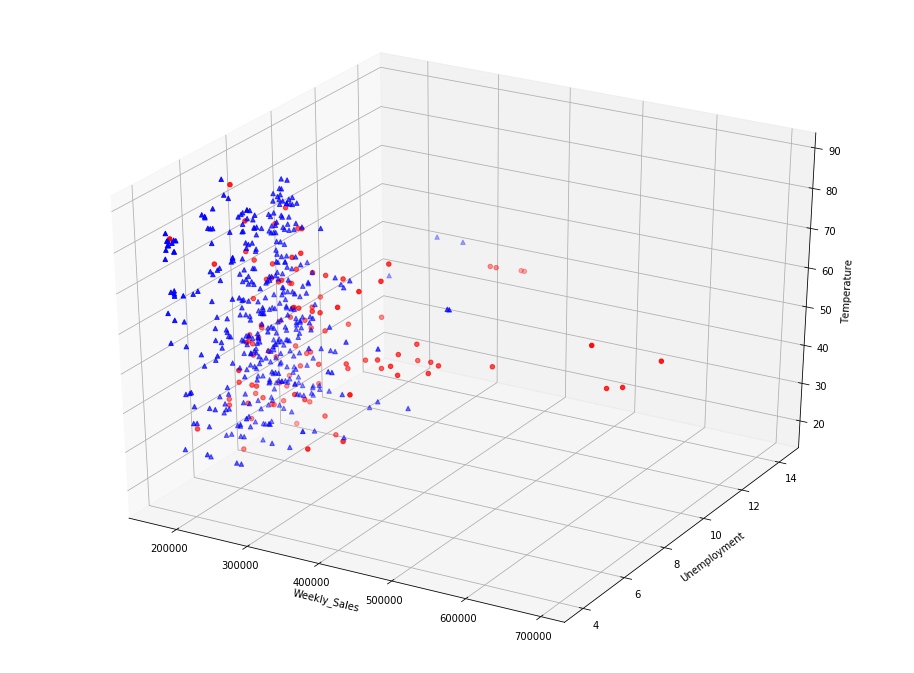

In [34]:
# Plot the raw data  

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')



x_ax_holiday = np.array(feature0_holiday)
y_ax_holiday = np.array(feature1_holiday)
z_ax_holiday = np.array(feature2_holiday)

x_ax_not_holiday = np.array(feature0_not_holiday)
y_ax_not_holiday = np.array(feature1_not_holiday)
z_ax_not_holiday = np.array(feature2_not_holiday)


ax.scatter(x_ax_holiday, y_ax_holiday, z_ax_holiday, marker='o', c = 'red')
ax.scatter(x_ax_not_holiday, y_ax_not_holiday, z_ax_not_holiday, marker='^', c = 'blue')



ax.set_xlabel('Weekly_Sales')
ax.set_ylabel('Unemployment')
ax.set_zlabel('Temperature')



plt.show()

# Requirements



** The PDF document and you rIPYNB script that you are submitting on Canvas must have the source code and the output for the following  requirements **


### Requirement #1: 
- Discuss the difference between **ROLLUP** and the **CUBE** that can be used in the **Group By** clause of the **SQL-SELECT** statement in PostgreSQL 10.5. 

### Requirement #2: 
- Get the descriptive statisitics per department

### Requirement #3: 
- Use the **CUBE** and dataframe to produce a listing of total sales per department across the entire list of stores

## Requirement #4: 

- Use the **CUBE** and dataframe to produce a listing of total sales per store across the entire list of departments for the week of 2010-02-19

## Requirement #5: 

- Use the **CUBE** and dataframe to produce a listing of total sales per department across the entire list of stores for the week of 2010-02-19



## Requirement #6: 

- Get  the top 500 weekly sales and plot them (Red color for Unemployment greater than or equal to 5 and Green color if it is less than 5) against the weekly Unemployment and Temperature 
